## Markovian representation of Fractional Brownian Motion

Mandelbrot-van Ness representation:
$$
W_{t}^{H} = W_{0}^{H} + \frac{1}{\Gamma(H+\frac{1}{2})}\bigg(\int_{0}^{t}(t-s)^{H - \frac{1}{2}}dW_{s} + 
\int_{-\infty}^{0}(t-s)^{H - \frac{1}{2}} - (-s)^{H - \frac{1}{2}}dW_{s}\bigg)
$$

Fractional kernal:
$$
K(t) = \frac{t^{H - \frac{1}{2}}}{\Gamma(H + \frac{1}{2})} 
$$

Laplacian representation of fractional kernal:
$$
K(t) = \int_{0}^{\infty}e^{-\gamma t}\mu(d\gamma), \quad \mu(d\gamma) = \frac{\gamma^{-H-\frac{1}{2}}}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}d\gamma
$$

By Stochastic Fubini theorem:
$$
W_{t}^{H} = W_{0}^{H} + \int_{0}^{\infty}(e^{-\gamma t}-1)\int_{-\infty}^{0}e^{\gamma s}dW_{s}\mu(d\gamma) + 
\int_{0}^{\infty}\int_{0}^{t}e^{\gamma(s-t)}dW_{s}\mu(d\gamma)
$$

Consider OU processes
$$
Y_{t}^{\gamma} = e^{-\gamma t}Y_{0}^{\gamma} + \int_{0}^{t}e^{-\gamma(t-s)}dW_{s}
$$
$$
Y_{0}^{\gamma} = \int_{-\infty}^{0}e^{\gamma s}dW_{s} \sim \mathcal{N}(0,\frac{1}{2\gamma})
$$
satisfying the following SDE
$$
dY_{t} = -\gamma Y_{t}dt + dW_{t}
$$

Therefore
$$
W_{t}^{H} = W_{0}^{H} + \int_{0}^{\infty}(Y_{t}^{\gamma} - Y_{0}^{\gamma})\mu(d\gamma)
$$

Note that $(Y_{0}^{\gamma})_{\gamma \geq 0}$ are not independent but with correlation 
$$
\mathbb{E}[Y_{0}^{x} Y_{0}^{y}] = \frac{1}{x+y}, \quad \text{Cov}(Y_{0}^{x},Y_{0}^{y}) = \frac{2\sqrt{xy}}{x+y}
$$


## Discretized approximation
Space discretization $0 = \eta_{0}^{n} \leq \eta_{1}^{n} \leq \cdots \leq \eta_{n}^{n}$ and $\gamma_{i}^{n} \in [\eta_{i}^{n},\eta_{i+1}^{n}]$

 [\\]:$$c_{i}^{n} = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\gamma^{-H-\frac{1}{2}}d\gamma$$

$$
c_{i}^{n} = \int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\mu(d\gamma) = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\frac{1}{\frac{1}{2}-H}\gamma^{\frac{1}{2}-H}\Big|_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}
$$


$$
\gamma_{i}^{n} = \frac{1}{c_{i}^{n}}\int_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}\gamma\mu(d\gamma) = \frac{1}{\Gamma(H + \frac{1}{2})\Gamma(\frac{1}{2} - H)}\frac{1}{\frac{3}{2}-H}\gamma^{\frac{3}{2}-H}\Big|_{\eta_{i}^{n}}^{\eta_{i+1}^{n}}
$$

$$
\mu^{n}(d\gamma) = \sum_{i = 1}^{M}c_{i}^{n}\delta_{\gamma_{i}^{n}}
$$

$$
K^{n}(t) = \sum_{i=1}^{M}c_{i}^{n}e^{-\gamma_{i}^{n} t}
$$

Consider $\eta_{i}^{n} = i\pi_{i}^{n}, i = 1,\cdots,n $. For convergence considertion we hope $\eta_{i}^{n}$ satisfies 
$$
\eta_{n}^{n} \to \infty,\quad \pi_{n}^{\frac{5}{2} - H}n^{\frac{1}{2}-H} \to 0
$$

We choose
$$
\pi_{n} = \frac{n^{-\frac{1}{5}}}{T}\bigg(\frac{\sqrt{10}(1-2H)}{5-2H}\bigg)^{\frac{2}{5}}
$$



### 1. OU processes approximation (Euler Method)
Consider OU processes with $x \in \mathbb{R}$
$$ dY_{t}^{x} = -xY_{t}^{x}dt + dW_t $$

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline  

$$
Y_{t+dt} =  e^{-xdt}\Big(Y_{t} + \int_{0}^{dt}e^{xs}dW_s\Big) 
$$

In [2]:
# One step forward of OU process
def OU_forward(Y_now,x,dt,dw,way = 'sde'):
    if way == 'sde':
        Y_next = Y_now - x*Y_now*dt + dw
    if way == 'cf':
        Y_next = np.exp(-x*dt)*(Y_now + np.exp(x*dt/2)*dw)
    if way == 'dis':
        Y_next = np.exp(-x*dt)*(Y_now + np.sqrt((np.exp(2*x*dt)-1)/(2*x*dt))*dw)
    return Y_next

In [3]:
# 1-d OU process stimulation
def OU1d(Y0,x,N,T, way = 'sde'):
    np.random.seed(1)
    Y = np.zeros(N+1)
    dt = T/N
    for i in range(N):
        dw = np.random.normal(0,np.sqrt(dt))
        Y[i+1] = OU_forward(Y[i],x,dt,dw,way)
    return Y

In [4]:
def OUx():
    T = 1
    N = 1000
    for x in [1,10,100]:
        Y = OU1d(0,x,N,T,way = 'cf')
        plt.plot(np.linspace(0,T,N+1),Y)
    plt.grid()
    plt.legend(['x = 1','x = 10','x = 100'])
    plt.show()

In [5]:
def OUstable():
    x = 100
    T = 1
    for N in [1000,100,50,40]:
        for way in ['sde','cf','dis']:
            Y = OU1d(0,x,N,T,way)
            plt.plot(np.linspace(0,T,N+1),Y)
        plt.legend(['SDE','Closed form','Distribution'])
        plt.grid()
        plt.title('N = ' + str(N) + ' dt = ' + str(T/N))
        plt.show()

In [6]:
# OUx()

In [7]:
# OUstable()

### 2. Fractional Brownian motion approximation

In [8]:
def space_grid(H,ep,way = 'exp'):
    alpha = H + 0.5
    if way == 'exp':
        r = 1 + ep
        start = ep**10 #**(1/(1-alpha))\
        end = (1/ep**10)
        nn = np.int(np.log(end/start)/np.log(r))+2
        grid = start*r**(np.arange(nn))
        grid = grid[grid<1e6]
        return grid.shape[0], np.concatenate((np.zeros(1), grid))
    if way == 'linear':
        nn = int(1/ep)
        dh = ((10*(1-2*H)**2)/(nn*(5-2*H)**2))**(1/5)/T
        h_grid = np.arange(nn+1)*dh
        return nn, h_grid

In [9]:
plt.rcParams['figure.figsize'] = (12.0, 4.0)
def fBM_generator(H, M, N, ep, T, PLOT = True):  # (H = Hurst, M = #samples, N = #steps, ep: grid parameter, Plot or not)
    np.random.seed(1)   
    alpha = H + 0.5
    
    # time grid
    dt = T/N
    t_grid = np.arange(N+1)*dt
    
    # space grid
    n, h_grid = space_grid(H,ep)
    print('Spatial grid points = ',n)
    
    # c and gamma
    h1_grid, h2_grid = h_grid**(0.5-H), h_grid**(1.5-H)
    c_grid = (h1_grid[1:] - h1_grid[:-1]) / (0.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H)
    gamma_grid = (h2_grid[1:] - h2_grid[0:-1]) / c_grid / (1.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H) 
    
    # plot space discretization information
    if PLOT:
        plt.plot(gamma_grid,c_grid,'-o',markersize=5)
        plt.grid()
        plt.title('Gamma - c plot')
        plt.show()
    
    # initiate vectors
    fBM = np.zeros(shape = (M,N+1))
    Y = np.zeros(shape = (M,N+1,n))
    multi_diffu = np.zeros(shape = (M,N+1,n+1))
    multi_incr = np.zeros(shape = (M,N,n+1))
    
    # Euler forward
    for it in range(N):
        dw =  np.random.normal(0,np.sqrt(dt),size = (M,1))
        dW = np.tile(dw,(1,n))
        
        Y[:,it+1,:] = OU_forward(Y[:,it,:],gamma_grid,dt,dW,way = 'cf')
        dY = Y[:,it+1,:] - Y[:,it,:]
        
        dfBM = np.sum(c_grid * dY, axis = -1)
        fBM[:,it+1] =  np.sum(c_grid * Y[:,it+1,:], axis = -1)
        
        multi_diffu[:,it+1,0] = fBM[:,it+1]
        multi_diffu[:,it+1,1:] = Y[:,it+1,:]
        
        multi_incr[:,it,0] = dfBM
        multi_incr[:,it,1:] = dY
        
        fBM_incr = fBM[:,1:] - fBM[:,:-1]
        
    if PLOT:
        for i in range(M):
            plt.plot(t_grid,fBM[i,:])
        plt.grid()
        plt.title(' n = ' + str(n))
        plt.show()
        
    return Y, fBM, fBM_incr, multi_diffu, multi_incr

In [1]:
# Y: (#samples, #steps, dim)
# fBM: (#samples, #steps)
# multi_diffu: (#samples, #steps, dim+1) 
# multi_incr: (#samples, #steps, dim+1)
H = 0.3
M = 3
N = 10000
T = 1
dt = T/N
# OU, fBM, fBM_incr, multi_diffu, multi_incr = fBM_generator(H, M, N, 0.5, T)

### Check Rough

In [21]:
def q_moment(fBM,q):
    fBM_incr = np.abs(fBM[1:] - fBM[:-1])
    return np.mean(fBM_incr**q)
def intercept(H,q):
    VH = (math.gamma(2-2*H) * np.cos(np.pi*H))/(np.pi * H * (1-2*H))
    opt = np.log( (2*VH)**(q/2) * math.gamma((q+1)/2) / np.sqrt(np.pi) )
    return opt 
def check_rough(H,N,dt,fBM):
    delta = []
    fBM_tmp = []
    for nn in range(1,101):        # only choose dt <= 0.01
        idx = list(range(0,N+1,nn))
        tmp = fBM[0,idx]
        fBM_tmp.append(tmp)
        delta.append(nn*dt)
    logdelta = np.log(np.array(delta))
    for q in [0.5,1,1.5,2,3]:
        logE = []
        for fbm in fBM_tmp:
            logE.append(np.log(q_moment(fbm,q)))
        plt.plot(logdelta,logE,'o',label = 'q = '+str(q), markersize=3) # empirical

        xx = np.linspace(logdelta[0],logdelta[-1],2)
        yy = q*H*(xx-logdelta[10]) + logE[10]
#         yy = intercept(H,q) + q*H*xx
        plt.plot(xx, yy) # theoretical
    plt.legend()
    plt.grid()
    plt.title('H = ' + str(H)  )
    plt.show()

Spatial grid points =  36


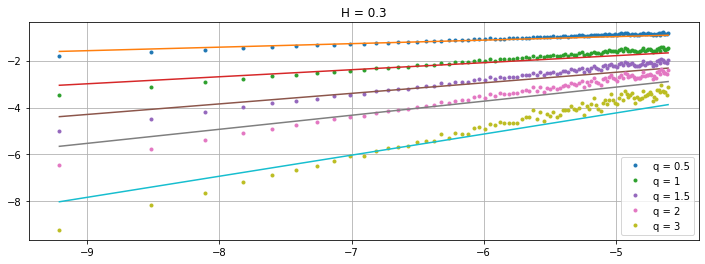

Spatial grid points =  387


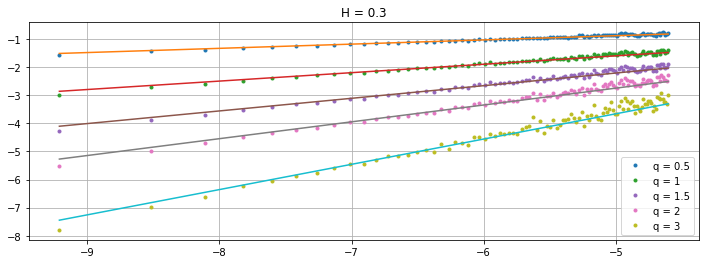

Spatial grid points =  6017


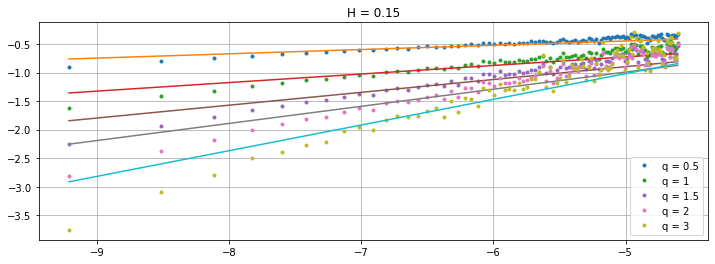

In [22]:
H = 0.3
M = 3
N = 10000
T = 1
dt = T/N
OU, fBM, fBM_incr, multi_diffu, multi_incr = fBM_generator(H, M, N, 0.5, T,False)
check_rough(H,N,dt,fBM)
OU, fBM, fBM_incr, multi_diffu, multi_incr = fBM_generator(H, M, N, 0.1, T,False)
check_rough(H,N,dt,fBM)
H = 0.15
OU, fBM, fBM_incr, multi_diffu, multi_incr = fBM_generator(H, M, N, 0.01, T,False)
check_rough(H,N,dt,fBM)

### Archive

In [18]:
# l = multi_diffu.shape[-1]//5
# for i in range(l):   
#     plt.plot(np.arange(N+1),multi_diffu[0,:,i*5])
# plt.grid()
# plt.show()

In [19]:
# def density_mu(x,H):
#     return x**(-0.5-H) / math.gamma(H+0.5) / math.gamma(0.5-H)
# grid = np.arange(1,1000)*0.01
# d = density_mu(grid,0.3)
# plt.plot(grid,d)
# plt.grid()
# plt.show()

In [15]:
def BM_generator(M,N,T,dt,PLOT = True):
#     np.random.seed(2)
    BM = np.zeros(shape = (M,N+1))
    for i in range(N):
        dW = np.random.normal(0,np.sqrt(dt),size = (M))
        BM[:,i+1] = BM[:,i] + dW
    if PLOT:
        plt.rcParams['figure.figsize'] = (12.0, 4.0)
        t_axis = np.arange(N+1)*dt
        for ii in range(M):
            plt.plot(t_axis,BM[ii,:])
        plt.plot(t_axis,t_axis)
        plt.grid()
        plt.show()
    return BM

In [16]:
def tt(M,N,T):
    dt = T/N
    BM = BM_generator(M, N, T, dt, PLOT =  False)
    X = np.zeros_like(BM)
    N = BM.shape[1]-1
    loss = 0
    for i in range(N):
        X[:,i+1] = X[:,i] + BM[:,i+1] - BM[:,i] - X[:,i] * dt
        loss += 2 * X[:,i]**2 * dt
    loss /= T
    return loss.mean()

In [20]:
# record = []
# for M in [1,10,100,1000]:
#     record.append(tt(M,10000,100))
# error = np.abs(np.array(record)-1)
# plt.figure(figsize=(6,4))
# plt.semilogy(error)
# plt.grid()
# plt.show()